Se inicia llamando las librerias pandas y seaborn

In [1]:
import pandas as pd
import seaborn as sns

Se llama el archivo del que se va a extraer la información

In [2]:
filelocation='Data/'
fileName='synergy_logistics_database.csv'
synergyDataFrame= pd.read_csv(filelocation+fileName, index_col='register_id')

Se preparan las columnas necesarias para organizar la infromación y se omiten las que no son reelevantes para el proyecto

In [3]:
necesarioDataFrame=synergyDataFrame[['direction', 'origin', 'destination', 'transport_mode', 'total_value']]
#necesarioDataFrame

Se comienza el conteo de las rutas

In [4]:
rutasEstablecidas=necesarioDataFrame.groupby(['direction', 'origin', 'destination', 'transport_mode']).count()
rutasEstablecidas=rutasEstablecidas.rename(columns={'total_value' :'Veces transitadas'})
rutasEstablecidas

Veces transitadas
direction origin               destination          transport_mode                   
Exports   Australia            Brazil               Sea                           112
                               Mexico               Sea                            51
                               Philippines          Sea                           114
                               Singapore            Sea                           273
                               Thailand             Sea                           200
...                                                                               ...
Imports   USA                  Japan                Air                            22
                               Thailand             Sea                           109
          United Arab Emirates India                Sea                            20
          United Kingdom       Canada               Sea                            58
          Vietnam              United Arab Emirates Sea                            18

[215 rows x 1 columns]

Se ordena la información obtenida de mayor a menor

In [5]:
rutasEstablecidas=rutasEstablecidas.sort_values(by='Veces transitadas', ascending=False)
rutasEstablecidas.head(10)
#rutasUnicas.tail(10)

Veces transitadas
direction origin      destination transport_mode                   
Exports   South Korea Vietnam     Sea                           497
          USA         Netherlands Sea                           436
          Netherlands Belgium     Road                          374
          China       Mexico      Air                           330
          Japan       Brazil      Sea                           306
          Germany     France      Road                          299
          South Korea Japan       Sea                           279
Imports   Singapore   Thailand    Sea                           273
Exports   Australia   Singapore   Sea                           273
          Canada      Mexico      Rail                          261

Se clasifican las rutas.
Primero las Exportaciones

In [6]:
rutasEstablecidas.xs('Exports')
rutasEstablecidas.xs('Exports').head(10)

,,,Veces transitadas
origin,destination,transport_mode,
South Korea,Vietnam,Sea,497
USA,Netherlands,Sea,436
Netherlands,Belgium,Road,374
China,Mexico,Air,330
Japan,Brazil,Sea,306
Germany,France,Road,299
South Korea,Japan,Sea,279
Australia,Singapore,Sea,273
Canada,Mexico,Rail,261


Se clasifican las rutas,
Después las Importaciones.

In [7]:
rutasEstablecidas.xs('Imports')
rutasEstablecidas.xs('Imports').head(10)

,,,Veces transitadas
origin,destination,transport_mode,
Singapore,Thailand,Sea,273
Germany,China,Sea,233
China,Japan,Air,210
Japan,Mexico,Sea,206
Malaysia,Thailand,Rail,195
China,Thailand,Road,145
Spain,Germany,Road,142
China,United Arab Emirates,Sea,114
Brazil,China,Sea,113


Se asigna lo obtenido a una variable nombrada rutasExp

In [8]:
rutasExp=rutasEstablecidas.xs('Exports')

Se asigna a una variable nombrada rutasImp

In [9]:
rutasImp=rutasEstablecidas.xs('Imports')

Se crea una columna llamada ruta_medio_Exp

In [10]:
rutasExp['ruta_medio_Exp']=rutasExp.index.to_list()

Se define una nueva función para que a la columna creada tenga como separador entre las rutas un 'guión' y 'coma' para los medios de transporte

In [11]:
def nombre_ruta_medio(lista):
    nombre=f'{lista[0]} - {lista[1]},{lista[2]}'
    return nombre

rutasExp['ruta_medio_Exp'] = rutasExp['ruta_medio_Exp'].apply(nombre_ruta_medio)

Se despliegan las 10 rutas de Exportación más demandadas

In [12]:
rutasExp.head(10)

,,,Veces transitadas,ruta_medio_Exp
origin,destination,transport_mode,,
South Korea,Vietnam,Sea,497,"South Korea - Vietnam,Sea"
USA,Netherlands,Sea,436,"USA - Netherlands,Sea"
Netherlands,Belgium,Road,374,"Netherlands - Belgium,Road"
China,Mexico,Air,330,"China - Mexico,Air"
Japan,Brazil,Sea,306,"Japan - Brazil,Sea"
Germany,France,Road,299,"Germany - France,Road"
South Korea,Japan,Sea,279,"South Korea - Japan,Sea"
Australia,Singapore,Sea,273,"Australia - Singapore,Sea"
Canada,Mexico,Rail,261,"Canada - Mexico,Rail"


Se crea una columna con la ruta y el medio de transporte

In [13]:
rutasImp['ruta_medio_Imp']=rutasImp.index.to_list()

In [14]:
rutasImp['ruta_medio_Imp'] = rutasImp['ruta_medio_Imp'].apply(nombre_ruta_medio)

Se despliegan las 10 rutas de Importacion más demandadas

In [15]:
rutasImp.head(10)

,,,Veces transitadas,ruta_medio_Imp
origin,destination,transport_mode,,
Singapore,Thailand,Sea,273,"Singapore - Thailand,Sea"
Germany,China,Sea,233,"Germany - China,Sea"
China,Japan,Air,210,"China - Japan,Air"
Japan,Mexico,Sea,206,"Japan - Mexico,Sea"
Malaysia,Thailand,Rail,195,"Malaysia - Thailand,Rail"
China,Thailand,Road,145,"China - Thailand,Road"
Spain,Germany,Road,142,"Spain - Germany,Road"
China,United Arab Emirates,Sea,114,"China - United Arab Emirates,Sea"
Brazil,China,Sea,113,"Brazil - China,Sea"


<AxesSubplot:xlabel='ruta_medio_Exp', ylabel='Veces transitadas'>

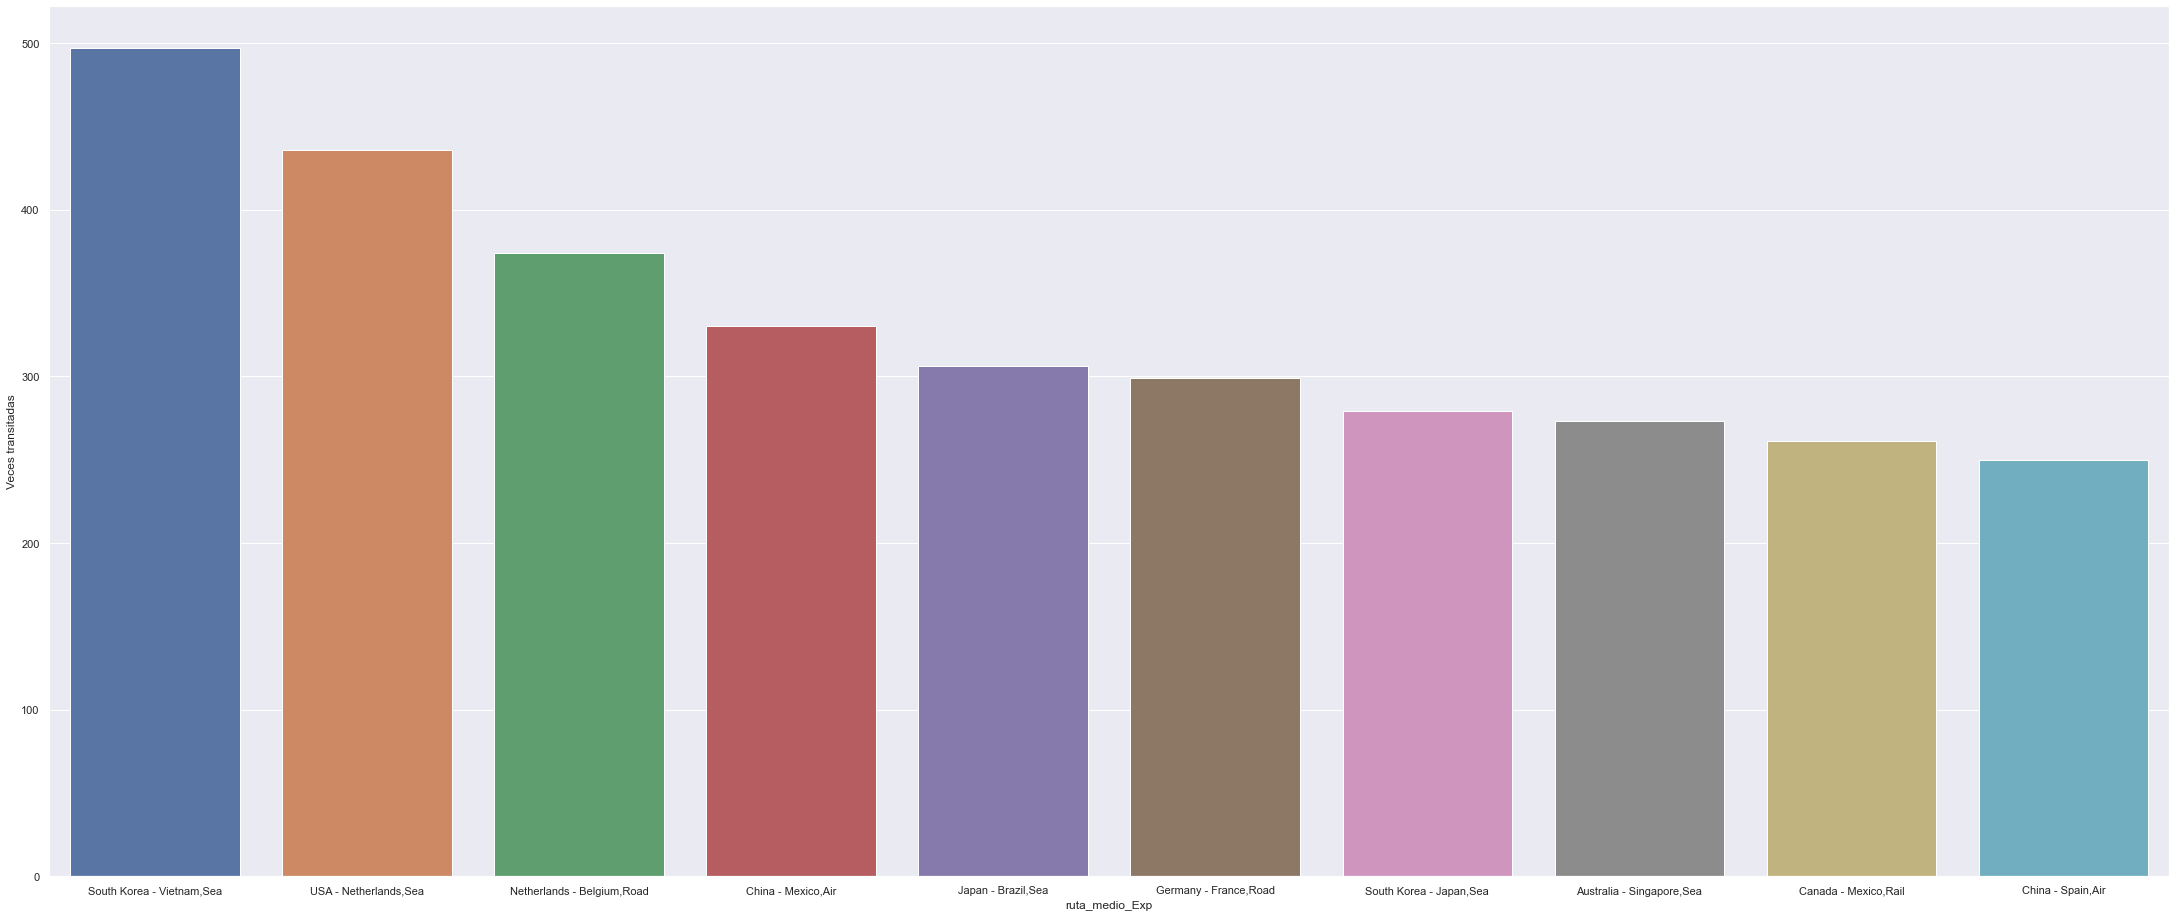

In [16]:
sns.set(rc={"figure.figsize":(38,16)})
sns.barplot(data=rutasExp.head(10),x='ruta_medio_Exp', y='Veces transitadas')

<AxesSubplot:xlabel='ruta_medio_Imp', ylabel='Veces transitadas'>

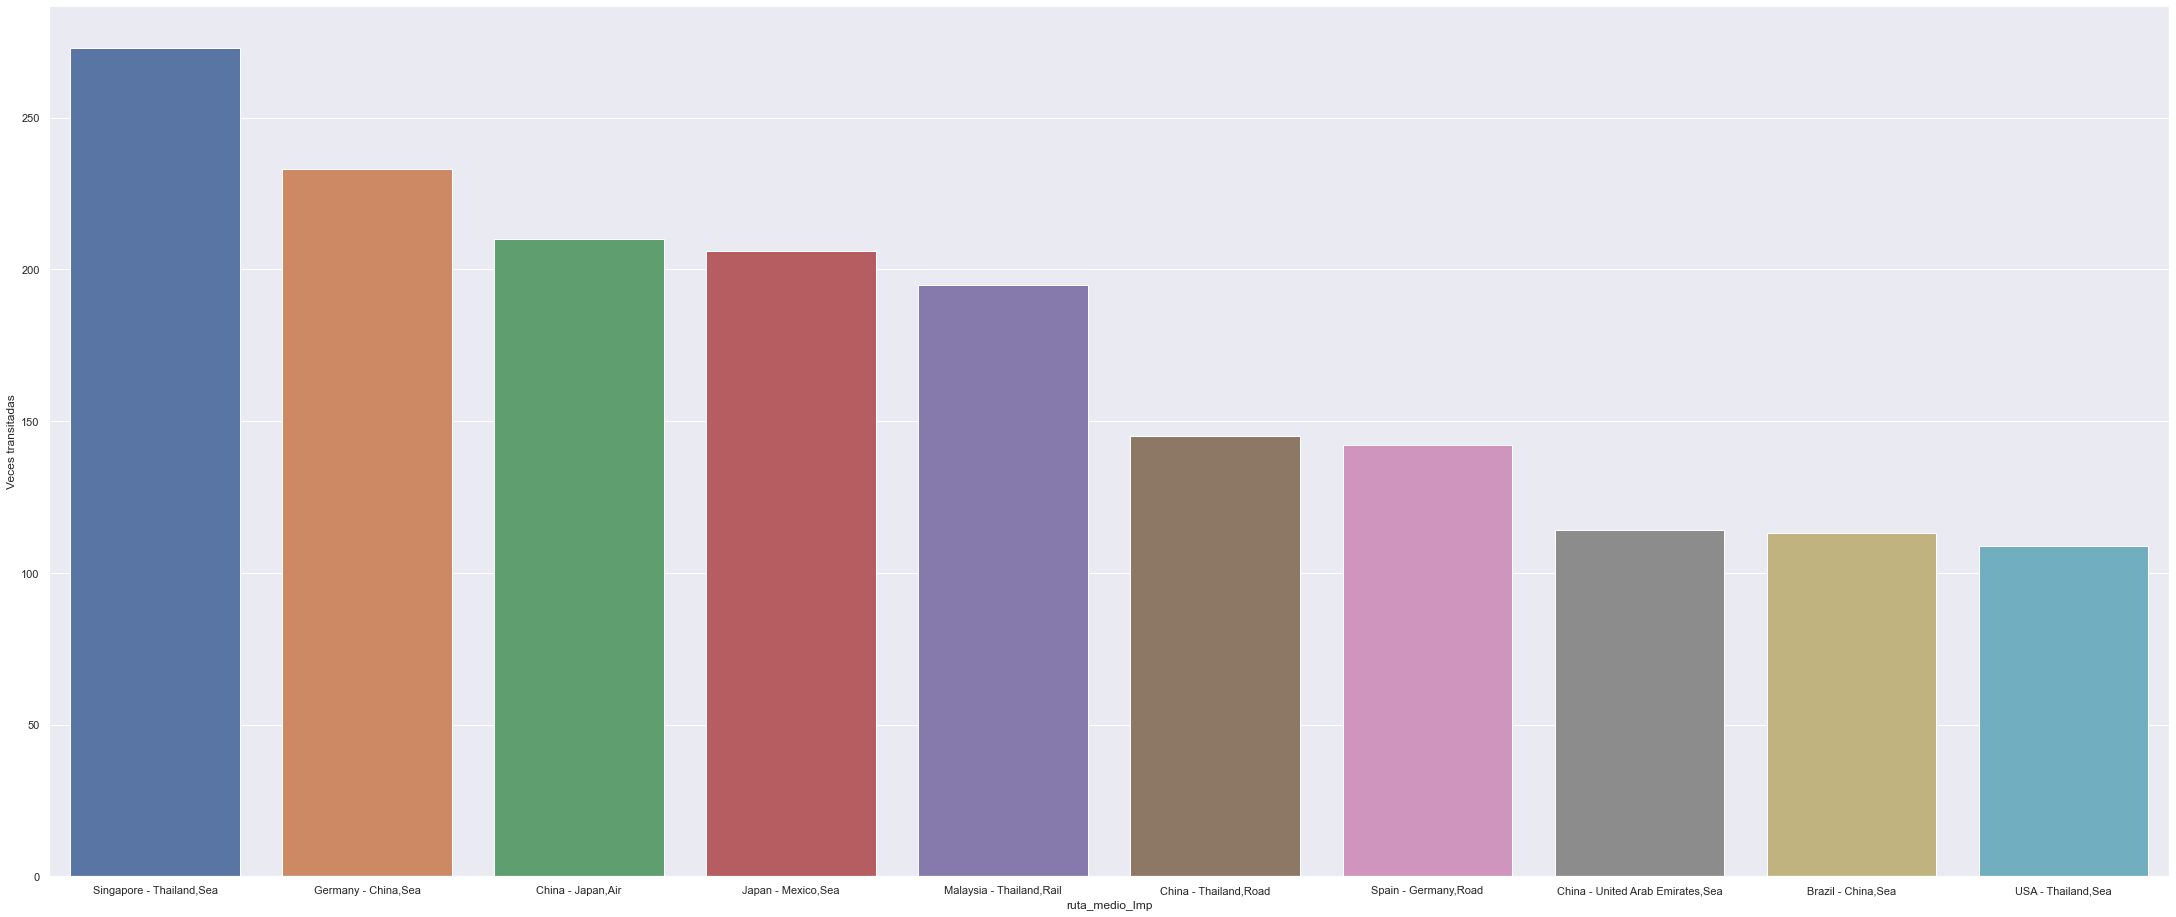

In [17]:
sns.set(rc={"figure.figsize":(38,16)})
sns.barplot(data=rutasImp.head(10),x='ruta_medio_Imp', y='Veces transitadas')

Opción 2

Se crean grupos y se cuentan los medios de transporte.
Después se ordenan de mayor a menor

In [18]:
s=synergyDataFrame.groupby('transport_mode').count()
desc=s.sort_values('total_value',ascending = False)
desc

,direction,origin,destination,year,date,product,company_name,total_value
transport_mode,,,,,,,,
Sea,10688,10688,10688,10688,10688,10688,10688,10688
Rail,3381,3381,3381,3381,3381,3381,3381,3381
Road,2598,2598,2598,2598,2598,2598,2598,2598
Air,2389,2389,2389,2389,2389,2389,2389,2389


Se muestran los tres medios de transporte más importantes, 
considerando el valor de sus importaciones y exportaciones

In [19]:
x=desc.head(3)
x

,direction,origin,destination,year,date,product,company_name,total_value
transport_mode,,,,,,,,
Sea,10688,10688,10688,10688,10688,10688,10688,10688
Rail,3381,3381,3381,3381,3381,3381,3381,3381
Road,2598,2598,2598,2598,2598,2598,2598,2598


Se grafican los tres medios de transporte más importantes

<AxesSubplot:xlabel='transport_mode', ylabel='direction'>

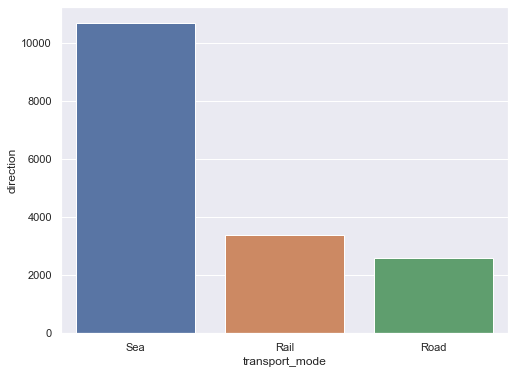

In [20]:
data = x
sns.set(rc={"figure.figsize": (8, 6)})  
sns.barplot(data=data, y='direction', x=data.index)

Punto 3

Se crea un grupos en función al tipo de envío,
Después se ordenan de mayor a menor

In [21]:
paisValor = synergyDataFrame.groupby(['direction', 'origin']).sum()
paisValor = paisValor.sort_values(by=['total_value'], ascending=False)

expPaisValor = paisValor.xs('Exports')
impPaisValor = paisValor.xs('Imports')

Se calcula el porcentaje por pais y exportación

In [22]:
total=expPaisValor.total_value.cumsum()
parte=expPaisValor.total_value.sum()

def percentage(percent, whole): 
    return (percent * whole) / parte
expPaisValor=percentage(100, total)
expPaisValor

origin
China              20.589640
France             32.211736
USA                43.672105
South Korea        52.801004
Russia             61.056953
Japan              68.517449
Germany            75.599741
Canada             82.270433
Italy              85.621191
Netherlands        88.193796
Spain              90.327868
United Kingdom     92.062105
India              93.701682
Belgium            95.317533
Brazil             96.737334
Switzerland        98.082211
Australia          99.112410
Mexico             99.998852
Austria            99.999573
Singapore         100.000000
Name: total_value, dtype: float64

Se despliegan los paises que conforman el 80% de las importaciones y exportaciones

EXPORTACIONES:

In [23]:
top_80 = expPaisValor[expPaisValor <=80]
top_80

origin
China          20.589640
France         32.211736
USA            43.672105
South Korea    52.801004
Russia         61.056953
Japan          68.517449
Germany        75.599741
Name: total_value, dtype: float64

Se calcula el porcentaje por pais e importación

In [24]:
total=impPaisValor.total_value.cumsum()
parte=impPaisValor.total_value.sum()

def percentage(percent, whole): 
    return (percent * whole) / parte
impPaisValor=percentage(100, total)
impPaisValor

origin
China                    22.030327
Japan                    36.606757
USA                      46.135283
Mexico                   54.457211
Germany                  62.111007
Singapore                69.345195
South Korea              76.348869
Malaysia                 82.760049
Spain                    88.164530
France                   90.534505
Italy                    92.818038
Australia                94.474860
Russia                   96.007420
Canada                   97.032128
Vietnam                  98.004610
Brazil                   98.885247
United Arab Emirates     99.553378
United Kingdom          100.000000
Name: total_value, dtype: float64

IMPORTACIONES:

In [25]:
top_80 = impPaisValor[impPaisValor <=80]
top_80

origin
China          22.030327
Japan          36.606757
USA            46.135283
Mexico         54.457211
Germany        62.111007
Singapore      69.345195
South Korea    76.348869
Name: total_value, dtype: float64